Мышковец С.А., v.1 06.03.2023

Решение задачи:

ДЗ - оценить возраст человека по изображению. 

Взять за основу любое предыдущее задание (если нет вычислительных ресурсов, то классификация заемщика, если есть, то классификация изображений или определение возраста, и реализовать стекинг несколькоих моделей). 

Требование: структуру моделе реализовать с использованием функций. 

Дополнительное требование (по возможности): структуру модели реализовать без использования последовательных API (через класс). Реализовать пользовательский цикл обучения. 
Фрэймворк выбора: на выбор учащегося. 

Основная задача ДЗ: отработать навыки самостоятельного написания моделей. 

# Загрузим файл .mat с целевыми данными

In [2]:
from scipy.io import loadmat
annots = loadmat('wiki.mat')

In [3]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'wiki'])

In [4]:
annots['wiki']

array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
              dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                array(['Dettmar Cramer'], dtype='<U14'),
                array(['Marc Okrand'], dtype='<U11'), ...,
                array(['Michael Wiesinger'], dtype='<U17'),
                array(['Johann Grugger'], dtype='<U14'),
                array(['Greta Van Susteren'], dtype='<U18')

**Достанем необходимые данные для формирования колонки возраст.**

In [5]:
dob_ = [i for i in annots['wiki'][0][0]['dob']]

In [6]:
dob = []
for i in dob_:
    for _ in i:
        dob.append(_)

In [7]:
photo_taken_=[i for i in annots['wiki'][0][0]['photo_taken']]

In [8]:
photo_taken = []
for i in photo_taken_:
    for _ in i:
        photo_taken.append(_)

In [9]:
full_path_=[i for i in annots['wiki'][0][0]['full_path']]

In [10]:
full_path = []
for i in full_path_:
    for a in i:
        for _ in a:
            full_path.append(_)

In [11]:
gender_=[i for i in annots['wiki'][0][0]['gender']]

In [12]:
# 0 for female and 1 for male, NaN if unknown
gender = []
for i in gender_:
    for _ in i:
        gender.append(_)

In [13]:
name_=[i for i in annots['wiki'][0][0]['name']]

In [14]:
name = []
for i in name_:
    for _ in i:
        name.append(_)

In [15]:
face_score_=[i for i in annots['wiki'][0][0]['face_score']]

In [16]:
face_score = []
for i in face_score_:
    for _ in i:
       face_score.append(_)

In [17]:
second_face_score_=[i for i in annots['wiki'][0][0]['second_face_score']]

In [18]:
# second_face_score is NaN if no second face was detected.
second_face_score = []
for i in second_face_score_:
    for _ in i:
       second_face_score.append(_)

In [19]:
face_location_=[i for i in annots['wiki'][0][0]['face_location']]

In [20]:
face_location = []
for i in face_location_:
    for a in i:
        for _ in a:
            face_location.append(_)

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame({'dob': dob, 
#                    'year_from_dob': year_from_dob,
                   'photo_taken': photo_taken, 
                   'full_path': full_path, 
                   'gender': gender, 
                   'name': name,
                   'face_score': face_score, 
                   'second_face_score': second_face_score,
                   'face_location': face_location}
                 )

In [23]:
df.head()

,dob,photo_taken,full_path,gender,name,face_score,second_face_score,face_location
0,723671,2009,17/10000217_1981-05-05_2009.jpg,1.0,[Sami Jauhojärvi],4.300962,NaN,"[111.29109473290997, 111.29109473290997, 252.6..."
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1.0,[Dettmar Cramer],2.645639,1.949248,"[252.48330229530742, 126.68165114765371, 354.5..."
2,711677,2008,12/100012_1948-07-03_2008.jpg,1.0,[Marc Okrand],4.329329,NaN,"[113.52, 169.83999999999997, 366.08, 422.4]"
3,705061,1961,65/10001965_1930-05-23_1961.jpg,1.0,[Aleksandar Matanović],-inf,NaN,"[1, 1, 634, 440]"
4,720044,2012,16/10002116_1971-05-31_2012.jpg,0.0,[Diana Damrau],3.408442,NaN,"[171.61031405173117, 75.57451239763239, 266.76..."


**Достанем год рождения из названия файлов.**

In [24]:
df['dob_year'] = [i.split("-")[-3][-4:] for i in df['full_path']]

In [25]:
df.head()

,dob,photo_taken,full_path,gender,name,face_score,second_face_score,face_location,dob_year
0,723671,2009,17/10000217_1981-05-05_2009.jpg,1.0,[Sami Jauhojärvi],4.300962,NaN,"[111.29109473290997, 111.29109473290997, 252.6...",1981
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1.0,[Dettmar Cramer],2.645639,1.949248,"[252.48330229530742, 126.68165114765371, 354.5...",1925
2,711677,2008,12/100012_1948-07-03_2008.jpg,1.0,[Marc Okrand],4.329329,NaN,"[113.52, 169.83999999999997, 366.08, 422.4]",1948
3,705061,1961,65/10001965_1930-05-23_1961.jpg,1.0,[Aleksandar Matanović],-inf,NaN,"[1, 1, 634, 440]",1930
4,720044,2012,16/10002116_1971-05-31_2012.jpg,0.0,[Diana Damrau],3.408442,NaN,"[171.61031405173117, 75.57451239763239, 266.76...",1971


**Удалим выбросы по году рождения.**

In [26]:
index_dob_year = df[ (df['dob_year'] == '_829')|(df['dob_year'] == '3_11')|(df['dob_year'] == '_647') ].index
df.drop(index_dob_year , inplace=True)

In [27]:
df['dob_year'] = [int(i) for i in df['dob_year']]

**Рассчитаем возраст.**

In [28]:
df['age'] = df['photo_taken'] - df['dob_year']

In [29]:
df.head()

,dob,photo_taken,full_path,gender,name,face_score,second_face_score,face_location,dob_year,age
0,723671,2009,17/10000217_1981-05-05_2009.jpg,1.0,[Sami Jauhojärvi],4.300962,NaN,"[111.29109473290997, 111.29109473290997, 252.6...",1981,28
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1.0,[Dettmar Cramer],2.645639,1.949248,"[252.48330229530742, 126.68165114765371, 354.5...",1925,39
2,711677,2008,12/100012_1948-07-03_2008.jpg,1.0,[Marc Okrand],4.329329,NaN,"[113.52, 169.83999999999997, 366.08, 422.4]",1948,60
3,705061,1961,65/10001965_1930-05-23_1961.jpg,1.0,[Aleksandar Matanović],-inf,NaN,"[1, 1, 634, 440]",1930,31
4,720044,2012,16/10002116_1971-05-31_2012.jpg,0.0,[Diana Damrau],3.408442,NaN,"[171.61031405173117, 75.57451239763239, 266.76...",1971,41


**Удалим записи с файлами без фото.**

In [30]:
index_no_face_score = df[df['face_score']<0].index
df.drop(index_no_face_score , inplace=True)

In [31]:
df.describe()

,dob,photo_taken,gender,face_score,second_face_score,dob_year,age
count,44311.000000,44311.000000,43451.000000,44311.000000,4096.000000,44311.000000,44311.000000
mean,717043.857597,2001.005619,0.751398,3.219190,2.009050,1962.705039,38.300580
std,9451.197802,19.813274,0.432207,1.244670,0.981277,25.879085,17.200174
min,498584.000000,1940.000000,0.000000,0.731430,0.731419,1365.000000,-39.000000
25%,710828.500000,2005.000000,1.000000,2.265090,1.164925,1946.000000,25.000000
50%,719641.000000,2010.000000,1.000000,3.237491,1.839065,1970.000000,33.000000
75%,724816.000000,2012.000000,1.000000,4.153265,2.655757,1984.000000,49.000000
max,735650.000000,2015.000000,1.000000,7.081268,5.463147,2014.000000,585.000000


**Удалим записи с возрастом меньше 0 и больше 100 лет.**

In [32]:
index_age = df[(df['age'] < 0)|((df['age'] > 100))].index
df.drop(index_age , inplace=True)

**Удалим записи с файлами, содержащими более 1 лица.**

In [33]:
index_second_face = df[(df['second_face_score'].isna() == False)].index
df.drop(index_second_face , inplace=True)

**Удалим использованные и более не нужные колонки.**

In [34]:
df = df.drop(['dob', 'photo_taken', 'dob_year', 'gender', 'second_face_score', 'face_score'], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40160 entries, 0 to 62327
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   full_path      40160 non-null  object
 1   name           40160 non-null  object
 2   face_location  40160 non-null  object
 3   age            40160 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [36]:
df.describe()

,age
count,40160.000000
mean,38.442878
std,16.573183
min,0.000000
25%,26.000000
50%,33.000000
75%,49.000000
max,100.000000


# Выведем фотографии из файлов, частично проверим верность целевых меток.

In [37]:
import os
hw_dir = os.getcwd()

In [38]:
data_folder_dir = os.getcwd()+'/wiki_crop'

**Сменим директорию.**

In [39]:
os.chdir(data_folder_dir)

**При помощи кода ниже пробежимся по папкам и проверим фото детей до 18 лет, удалим явные выбросы.**

14/170514_1963-03-06_1970.jpg


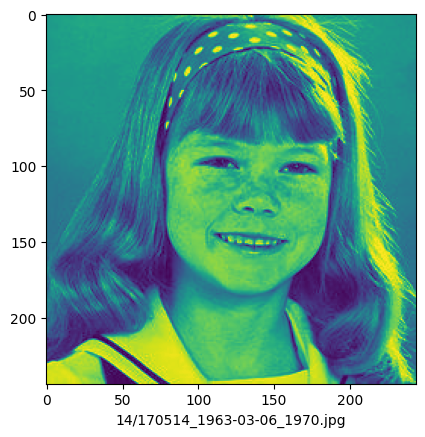

74/921974_1962-05-28_1969.jpg


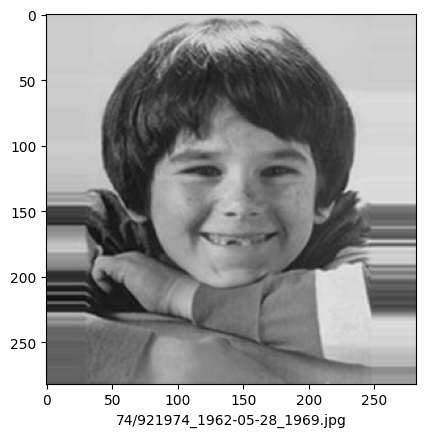

54/15100454_1933-07-03_1940.jpg


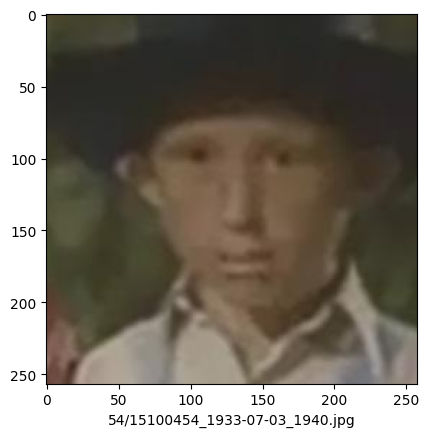

90/3021490_1964-09-19_1971.jpg


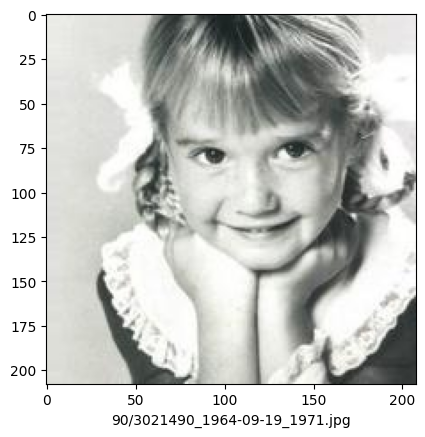

35/40267035_2004-06-17_2011.jpg


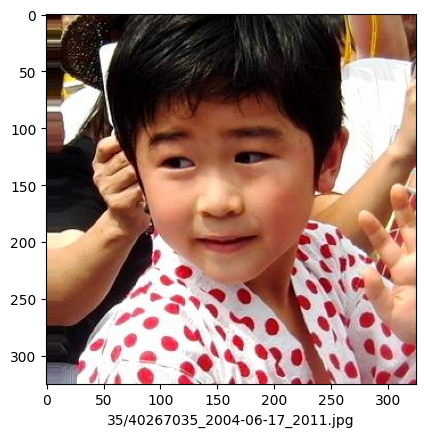

11/804611_1975-12-27_1982.jpg


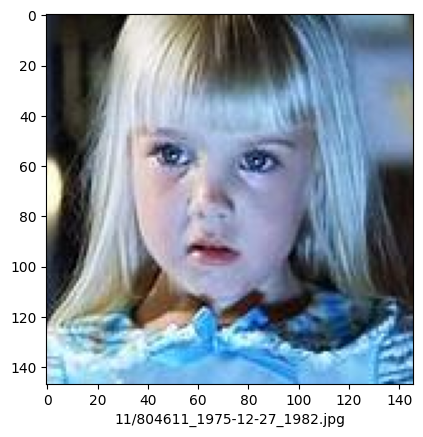

95/15476195_1998-01-02_2005.jpg


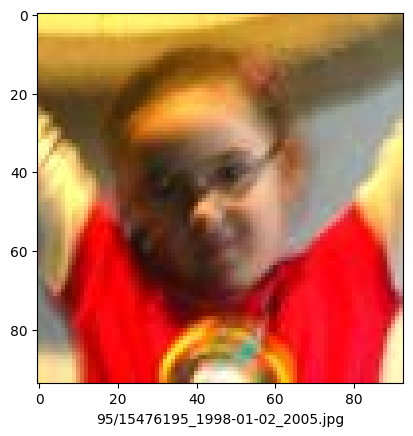

38/37738938_2005-10-17_2012.jpg


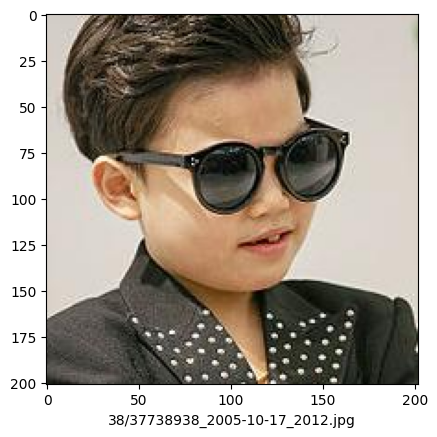

20/33953720_1994-12-17_2001.jpg


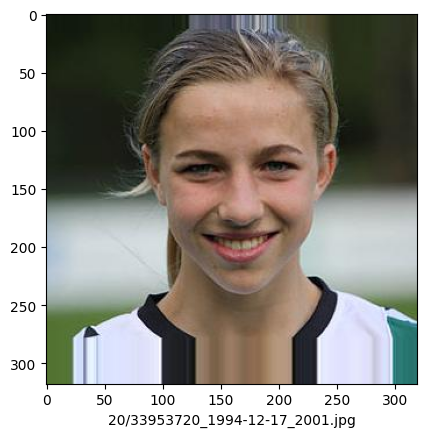

In [40]:
test = df[df['age']==7]
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in test['full_path']:
#     img = cv2.imread(file)
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.xlabel(i)
    print(i)
    plt.show()

In [41]:
index_age_0 = df[df['age']== 0].index
df.drop(index_age_0 , inplace=True)

In [42]:
index_age_1 = df[(df['age']== 1)&(df['full_path']== '33/6802033_1964-01-13_1965.jpg')].index
df.drop(index_age_1 , inplace=True)

27/34853027_2012-02-23_2013.jpg


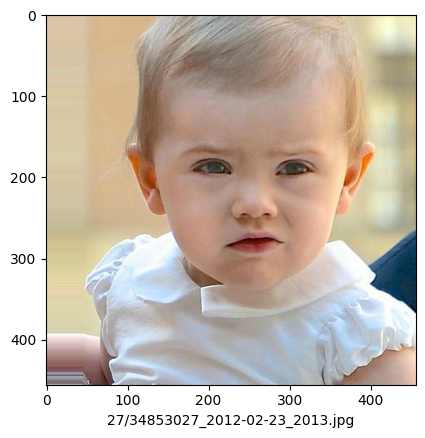

In [43]:
test = df[df['age']==1]
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in test['full_path']:
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.xlabel(i)
    print(i)
    plt.show()

In [44]:
index_age_3 = df[(df['age']== 3)&(df['full_path']== '57/35652957_1938-05-21_1941.jpg')].index
df.drop(index_age_3 , inplace=True)

In [45]:
index_age_7 = df[(df['age']== 7)&(df['full_path']== '20/33953720_1994-12-17_2001.jpg')].index
df.drop(index_age_7 , inplace=True)

In [46]:
index_age_11 = df[(df['age']== 11)&(df['full_path']== '88/46510488_1998-01-01_2009.jpg')].index
df.drop(index_age_11 , inplace=True)

In [47]:
index_age_12 = df[(df['age']== 12)&(df['full_path']== '31/36514731_1938-02-21_1950.jpg')].index
df.drop(index_age_12, inplace=True)

In [48]:
index_age_13 = df[(df['age']== 13)&((df['full_path']== '33/3617833_1947-08-03_1960.jpg')
                                    |(df['full_path']== '45/47175145_1998-04-15_2011.jpg')
                                    |(df['full_path']== '36/144936_1999-01-18_2012.jpg'))].index
df.drop(index_age_13, inplace=True)

In [49]:
index_age_14 = df[(df['age']== 14)&((df['full_path']== '51/35425151_1998-01-04_2012.jpg')
                                    |(df['full_path']== '11/22280011_1926-09-11_1940.jpg')
                                    |(df['full_path']== '90/44044890_2000-05-10_2014.jpg')
                                     |(df['full_path']== '71/615871_1956-09-23_1970.jpg')
                                    |(df['full_path']== '96/20810796_1995-09-27_2009.jpg')
                                     )].index
df.drop(index_age_14, inplace=True)

In [50]:
index_age_17 = df[(df['age']== 17)&((df['full_path']== '74/1090974_1971-03-12_1988.jpg')
                                     )].index
df.drop(index_age_17, inplace=True)

In [51]:
index_age_100= df[(df['age']== 14)&((df['full_path']== '64/535664_1910-02-27_2010.jpg')
                                    |(df['full_path']== '05/3281705_1873-01-03_1973.jpg')
                                    |(df['full_path']== '67/3284567_1885-11-27_1985.jpg')
                                     )].index
df.drop(index_age_100, inplace=True)

In [52]:
df.shape

(40143, 4)

In [53]:
df.head()

,full_path,name,face_location,age
0,17/10000217_1981-05-05_2009.jpg,[Sami Jauhojärvi],"[111.29109473290997, 111.29109473290997, 252.6...",28
2,12/100012_1948-07-03_2008.jpg,[Marc Okrand],"[113.52, 169.83999999999997, 366.08, 422.4]",60
4,16/10002116_1971-05-31_2012.jpg,[Diana Damrau],"[171.61031405173117, 75.57451239763239, 266.76...",41
5,02/10002702_1960-11-09_2012.jpg,[Krista Tippett],"[274.76563240288175, 57.7700900839337, 376.886...",52
6,41/10003541_1937-09-27_1971.jpg,[Bernie Whitebear],"[79.35580188693945, 26.65993396231315, 197.609...",34


array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

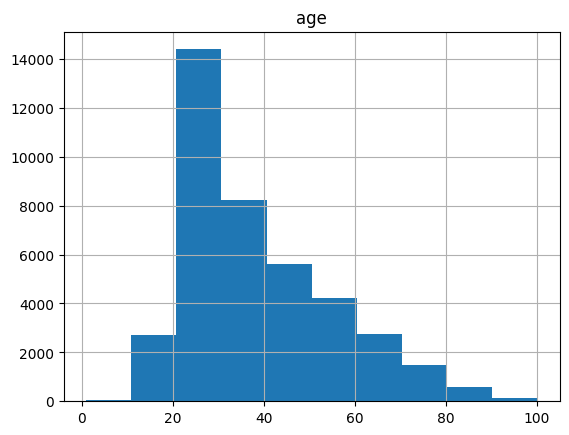

In [54]:
df.hist()

In [55]:
df_cut = df[['full_path', 'age']]

In [56]:
df_age_cut = []
for i in df_cut['age']:
    age = i//10
    df_age_cut.append(age)

In [57]:
df_cut['age_cut'] = df_age_cut

/var/folders/s8/yypls09j61bb1cjkz85h1n7c0000gn/T/ipykernel_5279/496406492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['age_cut'] = df_age_cut


In [58]:
df_cut

,full_path,age,age_cut
0,17/10000217_1981-05-05_2009.jpg,28,2
2,12/100012_1948-07-03_2008.jpg,60,6
4,16/10002116_1971-05-31_2012.jpg,41,4
5,02/10002702_1960-11-09_2012.jpg,52,5
6,41/10003541_1937-09-27_1971.jpg,34,3
...,...,...,...
62321,38/9996938_1937-02-15_1968.jpg,31,3
62322,46/9996946_1943-11-01_1968.jpg,25,2
62323,49/9996949_1937-04-17_1963.jpg,26,2
62325,09/9998109_1972-12-27_2013.jpg,41,4


In [59]:
df_cut = df_cut.drop(['age'], axis=1)

In [60]:
df_cut.head()

,full_path,age_cut
0,17/10000217_1981-05-05_2009.jpg,2
2,12/100012_1948-07-03_2008.jpg,6
4,16/10002116_1971-05-31_2012.jpg,4
5,02/10002702_1960-11-09_2012.jpg,5
6,41/10003541_1937-09-27_1971.jpg,3


In [61]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40143 entries, 0 to 62327
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_path  40143 non-null  object
 1   age_cut    40143 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 940.9+ KB


In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_cut['age_cut'] = labelencoder.fit_transform(df_cut['age_cut'])

In [63]:
full_path_new = []
for i in df_cut['full_path']:
    i = i.replace('/', '_')
    full_path_new.append(i)

df_cut['full_path_new'] = full_path_new


In [64]:
df_cut.head()

,full_path,age_cut,full_path_new
0,17/10000217_1981-05-05_2009.jpg,2,17_10000217_1981-05-05_2009.jpg
2,12/100012_1948-07-03_2008.jpg,6,12_100012_1948-07-03_2008.jpg
4,16/10002116_1971-05-31_2012.jpg,4,16_10002116_1971-05-31_2012.jpg
5,02/10002702_1960-11-09_2012.jpg,5,02_10002702_1960-11-09_2012.jpg
6,41/10003541_1937-09-27_1971.jpg,3,41_10003541_1937-09-27_1971.jpg


In [65]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40143 entries, 0 to 62327
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   full_path      40143 non-null  object
 1   age_cut        40143 non-null  int64 
 2   full_path_new  40143 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


array([[<AxesSubplot: title={'center': 'age_cut'}>]], dtype=object)

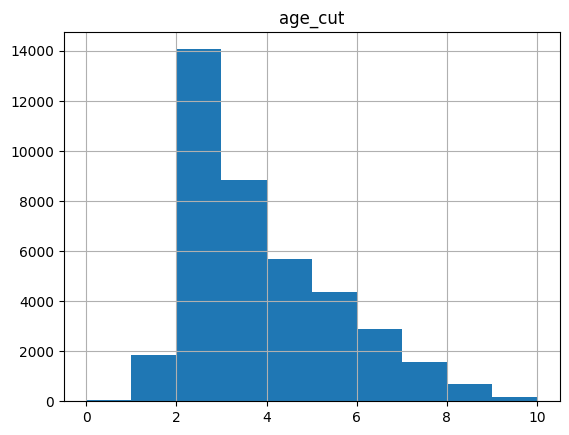

In [66]:
df_cut.hist()

In [67]:
df_cut.groupby('age_cut')['age_cut'].count()

age_cut
0        33
1      1833
2     14051
3      8846
4      5697
5      4381
6      2882
7      1555
8       685
9       165
10       15
Name: age_cut, dtype: int64

**Разделим данные на тренировочную, тестовую и валидационную выборку.**

In [68]:
from sklearn.model_selection import train_test_split

y = df_cut['age_cut']
X = df_cut['full_path_new']


X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0)

In [69]:
train_full, test= train_test_split(
    df_cut, test_size=0.3, stratify=df_cut['age_cut'], random_state=0)

In [70]:
train_full.groupby('age_cut')['age_cut'].count()

age_cut
0       23
1     1283
2     9836
3     6192
4     3988
5     3067
6     2017
7     1088
8      479
9      116
10      11
Name: age_cut, dtype: int64

In [71]:
test.groupby('age_cut')['age_cut'].count()

age_cut
0       10
1      550
2     4215
3     2654
4     1709
5     1314
6      865
7      467
8      206
9       49
10       4
Name: age_cut, dtype: int64

In [72]:
X_train_full.shape

(28100,)

In [73]:
train, valid = train_full[:-3100], train_full[-3100:]

In [74]:
train.head()

,full_path,age_cut,full_path_new
21727,81/34393481_1970-08-19_2012.jpg,4,81_34393481_1970-08-19_2012.jpg
20219,84/22357584_1987-12-04_2010.jpg,2,84_22357584_1987-12-04_2010.jpg
29060,06/26403306_1925-06-03_1948.jpg,2,06_26403306_1925-06-03_1948.jpg
49526,53/2871353_1972-10-04_2011.jpg,3,53_2871353_1972-10-04_2011.jpg
9562,13/15136713_1954-08-06_2014.jpg,6,13_15136713_1954-08-06_2014.jpg


In [75]:
os.chdir(hw_dir)

In [76]:
os.makedirs('train')

In [77]:
os.makedirs('test')

In [78]:
os.makedirs('valid')

In [79]:
train_files = []
for i in train['full_path']:
    train_files.append(i)
for a in train['age_cut']:
    train_files.append(a)

In [80]:
train

,full_path,age_cut,full_path_new
21727,81/34393481_1970-08-19_2012.jpg,4,81_34393481_1970-08-19_2012.jpg
20219,84/22357584_1987-12-04_2010.jpg,2,84_22357584_1987-12-04_2010.jpg
29060,06/26403306_1925-06-03_1948.jpg,2,06_26403306_1925-06-03_1948.jpg
49526,53/2871353_1972-10-04_2011.jpg,3,53_2871353_1972-10-04_2011.jpg
9562,13/15136713_1954-08-06_2014.jpg,6,13_15136713_1954-08-06_2014.jpg
...,...,...,...
45479,96/22755496_1987-07-17_2015.jpg,2,96_22755496_1987-07-17_2015.jpg
54791,59/17801759_1931-08-01_1954.jpg,2,59_17801759_1931-08-01_1954.jpg
32934,98/225498_1924-10-15_1993.jpg,6,98_225498_1924-10-15_1993.jpg
38405,60/2163460_1946-07-07_2011.jpg,6,60_2163460_1946-07-07_2011.jpg


In [81]:
test_files = []
for i in test['full_path']:
    test_files.append(i)
for a in test['age_cut']:
    test_files.append(a)

In [82]:
valid_files = []
for i in valid['full_path']:
    valid_files.append(i)
for a in valid['age_cut']:
    valid_files.append(a)

In [83]:
os.chdir(data_folder_dir)

In [84]:
# import shutil
import cv2
import numpy as np

In [85]:
train_dir = hw_dir + '/train'
test_dir = hw_dir + '/test'
valid_dir = hw_dir + '/valid'

In [86]:
for filename in os.listdir(data_folder_dir):
    if filename != '.DS_Store' and filename !='wiki.mat':
        for i in os.listdir(data_folder_dir + '/' + filename):
            file = filename + '/' + i
            if file in train_files:
                img = cv2.imread(file)
                img = cv2.resize(img, (224, 224))
                if img.shape[2] == 1:
                    img = np.dstack([img, img, img]) # Some images are in  greyscale (1 channel), 
                                                     # therefore convert them to 3 channel
                path = train_dir
                i = filename + '_' + i
                cv2.imwrite(os.path.join(path, i), img)
            if file in test_files:
                img = cv2.imread(file)
                img = cv2.resize(img, (224, 224))
                if img.shape[2] == 1:
                    img = np.dstack([img, img, img])
                path = test_dir
                i = filename + '_' + i
                cv2.imwrite(os.path.join(path, i), img)
            if file in valid_files:
                img = cv2.imread(file)
                img = cv2.resize(img, (224, 224))
                if img.shape[2] == 1:
                    img = np.dstack([img, img, img])
                path = valid_dir
                i = filename + '_' + i
                cv2.imwrite(os.path.join(path, i), img)

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
train_datagen=ImageDataGenerator(rescale=1./255.)

In [89]:
test_datagen=ImageDataGenerator(rescale=1./255.)

In [90]:
valid_datagen=ImageDataGenerator(rescale=1./255.)

In [91]:
TARGET_SIZE = (224,224)

train_gen=train_datagen.flow_from_dataframe(
dataframe=train,
directory=hw_dir + '/train',
x_col="full_path_new",
y_col="age_cut",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=TARGET_SIZE
)

valid_gen=train_datagen.flow_from_dataframe(
dataframe=valid,
directory=hw_dir + '/valid',
x_col="full_path_new",
y_col="age_cut",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=TARGET_SIZE
)

test_gen=test_datagen.flow_from_dataframe(
dataframe=test,
directory=hw_dir + '/test',
x_col="full_path_new",
y_col="age_cut",
batch_size=32,
seed=42,
shuffle=False,
class_mode="raw",
target_size=TARGET_SIZE
)

Found 25000 validated image filenames.
Found 3100 validated image filenames.
Found 12043 validated image filenames.


In [166]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D, Activation, GlobalMaxPool2D, GlobalAveragePooling2D, Input, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
          
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalMaxPool2D())
model.add(Dropout(0.5))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GlobalMaxPool2D())
# model.add(Dropout(0.3))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GlobalMaxPool2D())
# model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(11))
model.add(Activation('softmax'))

In [150]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_154 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_19 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 activation_115 (Activation)  (None, 222, 222, 32)     0         
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 111, 111, 32)     0         
 ng2D)                                                           
                                                                 
 dropout_100 (Dropout)       (None, 111, 111, 32)      0         
                                                                 
 conv2d_155 (Conv2D)         (None, 109, 109, 64)    

In [151]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [152]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(factor=0.2, patience=3)

checkpoint_cb = ModelCheckpoint("ConvModel.h5", 
                                     monitor = "val_accuracy",
                                     save_best_only=True)

In [153]:
history = model.fit(train_gen,
                    validation_data=valid_gen,
                    callbacks=[checkpoint_cb, lr_scheduler],
                    epochs=50)

Epoch 1/50


2023-04-09 21:43:56.729399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.8388 - accuracy: 0.3396

2023-04-09 21:45:24.624630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 92s 117ms/step - loss: 1.8388 - accuracy: 0.3396 - val_loss: 1.8029 - val_accuracy: 0.3568 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 89s 114ms/step - loss: 1.6953 - accuracy: 0.3532 - val_loss: 1.7565 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 89s 114ms/step - loss: 1.6600 - accuracy: 0.3655 - val_loss: 1.8365 - val_accuracy: 0.3594 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 89s 114ms/step - loss: 1.6467 - accuracy: 0.3668 - val_loss: 1.7665 - val_accuracy: 0.3574 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 90s 115ms/step - loss: 1.6238 - accuracy: 0.3748 - val_loss: 1.7428 - val_accuracy: 0.3568 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 89s 114ms/step - loss: 1.6151 - accuracy: 0.3759 - val_loss: 1.6949 - val_accuracy: 0.3697 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 92s 118ms

In [154]:
def test_val_graph (history,train,val):
    plt.plot(history.history[train], label='Точность на обучающем наборе')
    plt.plot(history.history[val], label='Точность на проверочном наборе')
    plt.xlabel('Цикл обучения')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()
    pass;

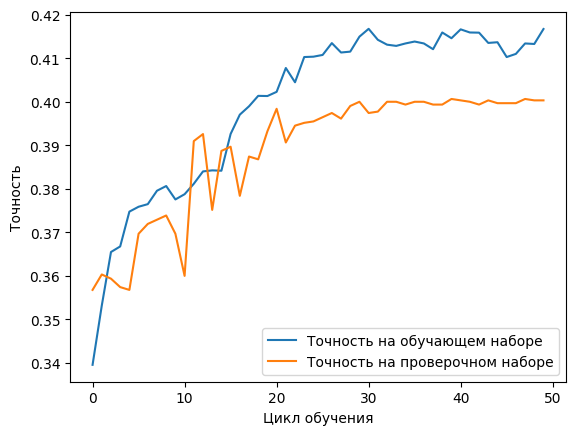

In [155]:
test_val_graph (history,'accuracy','val_accuracy')

In [133]:
model.evaluate (test_gen)

377/377 [==============================] - 11s 30ms/step - loss: 1.6083 - accuracy: 0.3889


[1.608254313468933, 0.38885658979415894]

In [182]:
target_size = (224,224,3) 
input = Input(shape= target_size) 

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input) 
x = MaxPool2D(2,2)(x) 

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(2,2)(x) 

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(2,2)(x) 

x = Conv2D(filters=256, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(2,2)(x) 
x = GlobalMaxPool2D()(x)
x = Dropout(0.25)(x) 
x = Flatten()(x) 
x = Dense(units=128, activation='relu')(x) 
x = Dense(units=64, activation='relu')(x) 
output = Dense(units=11, activation='softmax')(x) 

custom_model  = Model(input, output, name= 'Custom_Model')

In [183]:
custom_model.summary()

Model: "Custom_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_197 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 111, 111, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_198 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 54, 54, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_199 (Conv2D)         (None, 52, 52, 128)      

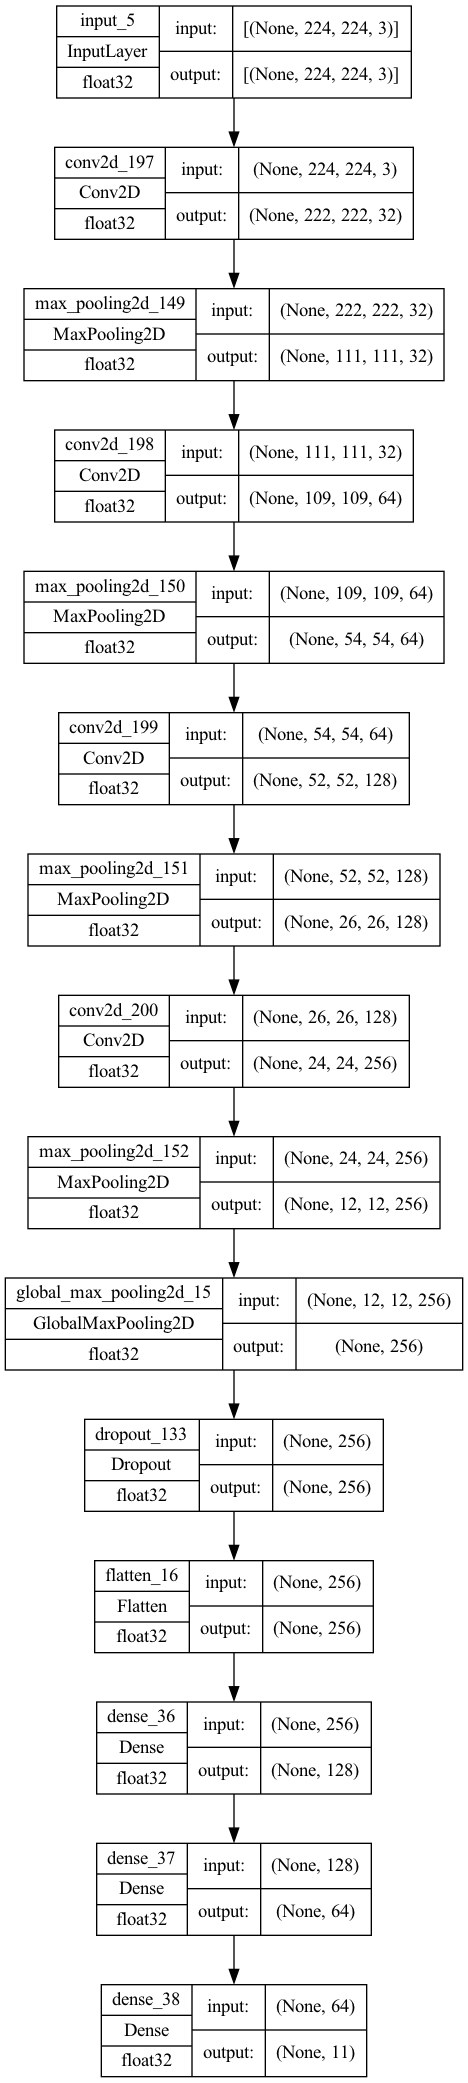

In [184]:
# show model structure 
from tensorflow.keras.utils import plot_model 
plot_model(custom_model,show_shapes=True,
    show_dtype=True,
    show_layer_names=True)

In [185]:
# compile model
custom_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

# initialize callbacks 
reduceLR = ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

early_stopping = EarlyStopping(monitor='val_loss', patience = 5 , verbose=1, mode='min', restore_best_weights= True) 

checkpoint = ModelCheckpoint('CustomModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

callbacks= [reduceLR, early_stopping,checkpoint]

In [195]:
import os
os.getcwd()

'/Users/sviatlanamyshkavets/Documents/Courses/DS TM/DS3onl/Sviatlana Myshkavets/HW33_Myshkavets S.A./wiki_crop'

In [186]:
epochs = 10 
custom_model.fit(train_gen, validation_data=valid_gen, epochs= epochs, callbacks= callbacks)

Epoch 1/10


2023-04-09 23:22:49.179236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.7935 - accuracy: 0.3454

2023-04-09 23:23:55.256057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.74661, saving model to CustomModel.weights.hdf5
782/782 [==============================] - 69s 87ms/step - loss: 1.7935 - accuracy: 0.3454 - val_loss: 1.7466 - val_accuracy: 0.3568 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 1.7290 - accuracy: 0.3510
Epoch 2: val_loss improved from 1.74661 to 1.70351, saving model to CustomModel.weights.hdf5
782/782 [==============================] - 68s 86ms/step - loss: 1.7290 - accuracy: 0.3510 - val_loss: 1.7035 - val_accuracy: 0.3610 - lr: 0.0010
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 1.6992 - accuracy: 0.3569
Epoch 3: val_loss improved from 1.70351 to 1.68102, saving model to CustomModel.weights.hdf5
782/782 [==============================] - 68s 87ms/step - loss: 1.6992 - accuracy: 0.3569 - val_loss: 1.6810 - val_accuracy: 0.3619 - lr: 0.0010
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 1.6732 - accuracy: 0.358

In [187]:
import tensorflow as tf
model =  tf.keras.models.load_model('CustomModel.weights.hdf5')

In [188]:
# Evaluate the model 
model.evaluate(test_gen)

  1/377 [..............................] - ETA: 1:26 - loss: 1.5259 - accuracy: 0.3750

2023-04-09 23:34:17.384922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


377/377 [==============================] - 11s 29ms/step - loss: 1.5259 - accuracy: 0.4000


[1.5259078741073608, 0.39998340606689453]

In [189]:
# Import the VGG16 pretrained model 
from tensorflow.keras.applications import VGG16 

vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False) 

for i in vgg16.layers[:-3]:
    i.trainable = False 

# build model 
input = vgg16.layers[-1].output # input is the last output from vgg16 

x = Dropout(0.25)(input) 
x = Flatten()(x) 
output = Dense(8, activation='softmax')(x) 

# create the model 
vgg16_model = Model(vgg16.input, output, name='VGG16_Model')

58889256/58889256 [==============================] - 5s 0us/step


In [190]:
vgg16_model.summary()

Model: "VGG16_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       

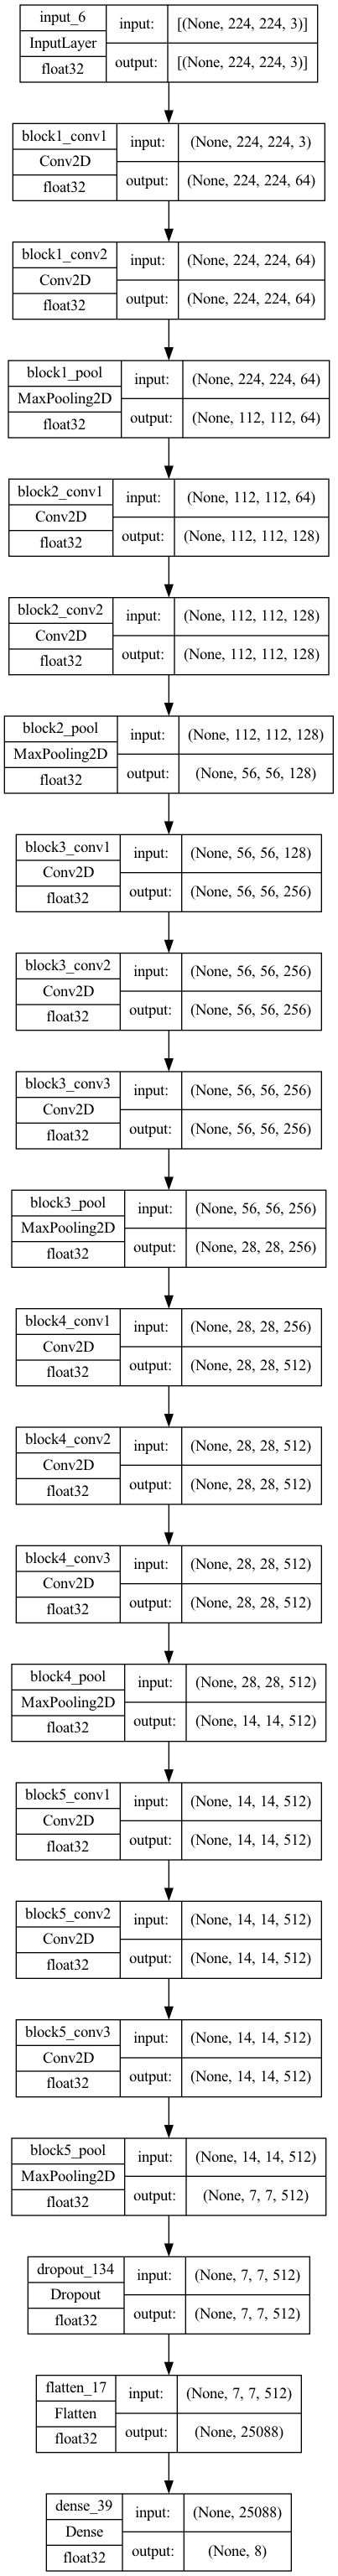

In [191]:
# show model structure 
from tensorflow.keras.utils import plot_model 
plot_model(vgg16_model,show_shapes=True,
    show_dtype=True,
    show_layer_names=True)

In [197]:
# compile the model 
import tensorflow as tf
vgg16_model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) 

# reinitialize callbacks 
checkpoint = ModelCheckpoint('VggModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

callbacks= [reduceLR, early_stopping,checkpoint] 

OSError: No file or directory found at VggModel.weights.hdf5

In [198]:
# Train model 
vgg16_model.fit(train_gen, validation_data=valid_gen, epochs= epochs, callbacks= callbacks)

Epoch 1/10


2023-04-09 23:54:54.590518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.6274 - accuracy: 0.3460

2023-04-09 23:58:36.307012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.47523, saving model to VggModel.weights.hdf5
782/782 [==============================] - 247s 314ms/step - loss: 1.6274 - accuracy: 0.3460 - val_loss: 1.4752 - val_accuracy: 0.3871 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 1.6166 - accuracy: 0.3664
Epoch 2: val_loss did not improve from 1.47523
782/782 [==============================] - 248s 317ms/step - loss: 1.6166 - accuracy: 0.3664 - val_loss: 1.7674 - val_accuracy: 0.4116 - lr: 0.0010
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 2.0041 - accuracy: 0.3524
Epoch 3: val_loss did not improve from 1.47523
782/782 [==============================] - 244s 313ms/step - loss: 2.0041 - accuracy: 0.3524 - val_loss: 2.5542 - val_accuracy: 0.4052 - lr: 0.0010
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 2.7934 - accuracy: 0.3410
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 4: 

In [199]:
vgg16_model =  tf.keras.models.load_model('VggModel.weights.hdf5')

In [200]:
# Evaluate the model 
vgg16_model.evaluate(test_gen)


2023-04-10 00:19:48.053826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


377/377 [==============================] - 95s 252ms/step - loss: 1.4980 - accuracy: 0.3819


[1.4979619979858398, 0.38188159465789795]

In [201]:
# initializing the mobilenet model
import tensorflow as tf
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)

# freezing all but the last 5 layers
for layer in mobilenet.layers[:-5]:
  layer.trainable = False

# add few mor layers
x = mobilenet.layers[-1].output
x = Dropout(0.5)(x)
x = Flatten()(x) 
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
output = Dense(11, activation='softmax')(x)

# Create the model
mobilenet_model = Model(mobilenet.input, output, name= "Mobilenet_Model")

17225924/17225924 [==============================] - 2s 0us/step


In [202]:
mobilenet_model.summary()

Model: "Mobilenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                            

In [206]:
# compile the model 
mobilenet_model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) 

# reinitialize callbacks 
checkpoint = ModelCheckpoint('MobilenetModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

callbacks= [reduceLR, early_stopping,checkpoint] 

In [207]:
# model training 
mobilenet_model.fit(train_gen, validation_data=valid_gen, epochs=epochs, callbacks= callbacks)

Epoch 1/10


2023-04-10 00:23:12.622637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 2.1637 - accuracy: 0.3156

2023-04-10 00:23:56.833217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.91066, saving model to MobilenetModel.weights.hdf5
782/782 [==============================] - 50s 61ms/step - loss: 2.1637 - accuracy: 0.3156 - val_loss: 1.9107 - val_accuracy: 0.3584 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 1.9371 - accuracy: 0.3305
Epoch 2: val_loss improved from 1.91066 to 1.78936, saving model to MobilenetModel.weights.hdf5
782/782 [==============================] - 46s 58ms/step - loss: 1.9371 - accuracy: 0.3305 - val_loss: 1.7894 - val_accuracy: 0.3568 - lr: 0.0010
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 1.8162 - accuracy: 0.3292
Epoch 3: val_loss improved from 1.78936 to 1.74015, saving model to MobilenetModel.weights.hdf5
782/782 [==============================] - 46s 58ms/step - loss: 1.8162 - accuracy: 0.3292 - val_loss: 1.7402 - val_accuracy: 0.3568 - lr: 0.0010
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 1.7344 - accura

In [208]:
mobilenet_model =  tf.keras.models.load_model('MobilenetModel.weights.hdf5')

In [209]:
# Evaluate the model 
mobilenet_model.evaluate(test_gen)

2023-04-10 00:32:49.999125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


377/377 [==============================] - 18s 47ms/step - loss: 1.6122 - accuracy: 0.3852


[1.6122499704360962, 0.3852030336856842]